In [5]:
import time
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, average_precision_score

In [2]:
# Define data paths and training parameters
img_width, img_height = 224, 224
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
test_data_dir = 'data/test'
epochs = 30
batch_size = 32

In [3]:
# Data augmentation for training with various techniques
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20)

# Only rescale for validation and test sets
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load data with flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1517 images belonging to 20 classes.
Found 164 images belonging to 20 classes.
Found 164 images belonging to 20 classes.


In [38]:
# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
          input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Add dropout for regularization

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Add dropout for regularization

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Add dropout for regularization

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model with Adam optimizer and monitor validation loss
model.compile(loss='categorical_crossentropy',
              # Experiment with different learning rates
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy'])

# Early stopping to prevent overfitting based on validation loss
early_stopping = EarlyStopping(
    monitor='val_loss', patience=20, verbose=1, mode='min')

# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping])

# Evaluate the model on test data and print accuracy and loss
(eval_loss, eval_accuracy) = model.evaluate_generator(
    test_generator, steps=test_generator.samples // batch_size, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))

c:\Users\Bhuvan.L.Poojari\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\Bhuvan.L.Poojari\AppData\Local\Temp\ipykernel_10720\833839012.py:32: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
47/47 [==============================] - 391s 8s/step - loss: 3.0610 - accuracy: 0.0613 - val_loss: 2.9809 - val_accuracy: 0.0812
Epoch 2/30
47/47 [==============================] - 379s 8s/step - loss: 2.8622 - accuracy: 0.1401 - val_loss: 2.9119 - val_accuracy: 0.1875
Epoch 3/30
47/47 [==============================] - 398s 8s/step - loss: 2.7368 - accuracy: 0.1710 - val_loss: 2.7800 - val_accuracy: 0.1937
Epoch 4/30
47/47 [==============================] - 391s 8s/step - loss: 2.5495 - accuracy: 0.2411 - val_loss: 2.6142 - val_accuracy: 0.2500
Epoch 5/30
47/47 [==============================] - 416s 9s/step - loss: 2.4404 - accuracy: 0.2714 - val_loss: 2.5265 - val_accuracy: 0.2875
Epoch 6/30
47/47 [==============================] - 418s 9s/step - loss: 2.3016 - accuracy: 0.3064 - val_loss: 2.4245 - val_accuracy: 0.3063
Epoch 7/30
47/47 [==============================] - 435s 9s/step - loss: 2.1933 - accuracy: 0.3212 - val_loss: 2.3482 - val_accuracy: 0.2875
Epoch 8/30
47

C:\Users\Bhuvan.L.Poojari\AppData\Local\Temp\ipykernel_10720\833839012.py:41: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  (eval_loss, eval_accuracy) = model.evaluate_generator(


5/5 [==============================] - 14s 3s/step - loss: 1.8689 - accuracy: 0.4625
[INFO] accuracy: 46.25%
[INFO] Loss: 1.8688768148422241


In [ ]:
model.summary()

In [69]:
top_model_weights_path = 'self_trained_bottleneck_fc_model_2.h5'
model.save_weights(top_model_weights_path)

# Save the model
filepath = 'model_save_selftrained_2.h5'
model.save(filepath)

model.save('saveselftrained_2.h5')

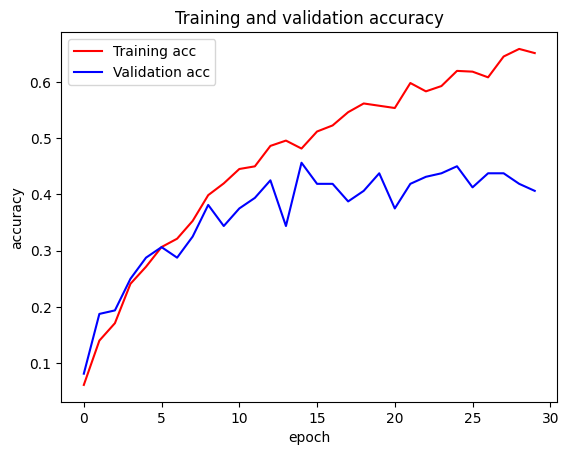

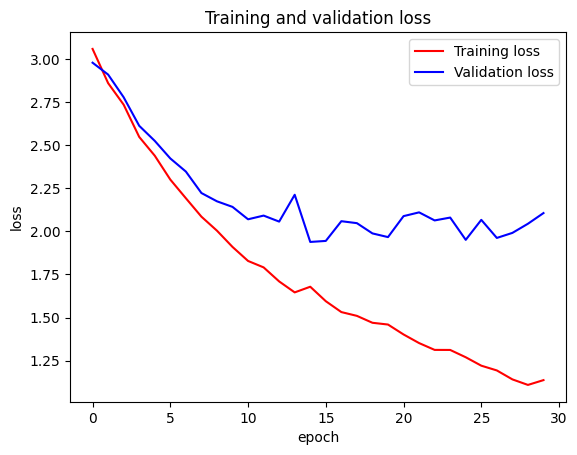

In [93]:
# Graphing our training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [94]:
# Evaluate the model's performance
test_labels = test_generator.classes
preds = model.predict_generator(
    test_generator, steps=len(test_generator), verbose=1)
preds_classes = np.argmax(preds, axis=1)

# Classification report
animals = ['bear', 'cougar', 'coyote', 'cow', 'crocodiles', 'deer', 'elephant', 'giraffe', 'goat',
           'gorilla', 'horse', 'kangaroo', 'leopard', 'lion', 'panda', 'penguin', 'sheep', 'skunk', 'tiger', 'zebra']
classification_metrics = classification_report(
    test_labels, preds_classes, target_names=animals)
print(classification_metrics)

C:\Users\Bhuvan.L.Poojari\AppData\Local\Temp\ipykernel_10720\4277931373.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(


6/6 [==============================] - 12s 2s/step
              precision    recall  f1-score   support

        bear       0.08      0.20      0.11        10
      cougar       0.00      0.00      0.00        10
      coyote       0.00      0.00      0.00        10
         cow       0.00      0.00      0.00        10
  crocodiles       0.00      0.00      0.00        10
        deer       0.00      0.00      0.00        10
    elephant       0.00      0.00      0.00        10
     giraffe       0.00      0.00      0.00         6
        goat       0.00      0.00      0.00         9
     gorilla       0.00      0.00      0.00         6
       horse       0.00      0.00      0.00        10
    kangaroo       0.33      0.14      0.20         7
     leopard       0.06      0.10      0.08        10
        lion       0.00      0.00      0.00         9
       panda       0.33      0.25      0.29         8
     penguin       0.17      0.20      0.18         5
       sheep       0.00      0

In [95]:
print("Length of true labels:", len(test_labels))
print("Length of predicted classes:", len(preds_classes))

Length of true labels: 164
Length of predicted classes: 164


In [103]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, preds_classes)

In [105]:
# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figsize=(10, 8)):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization


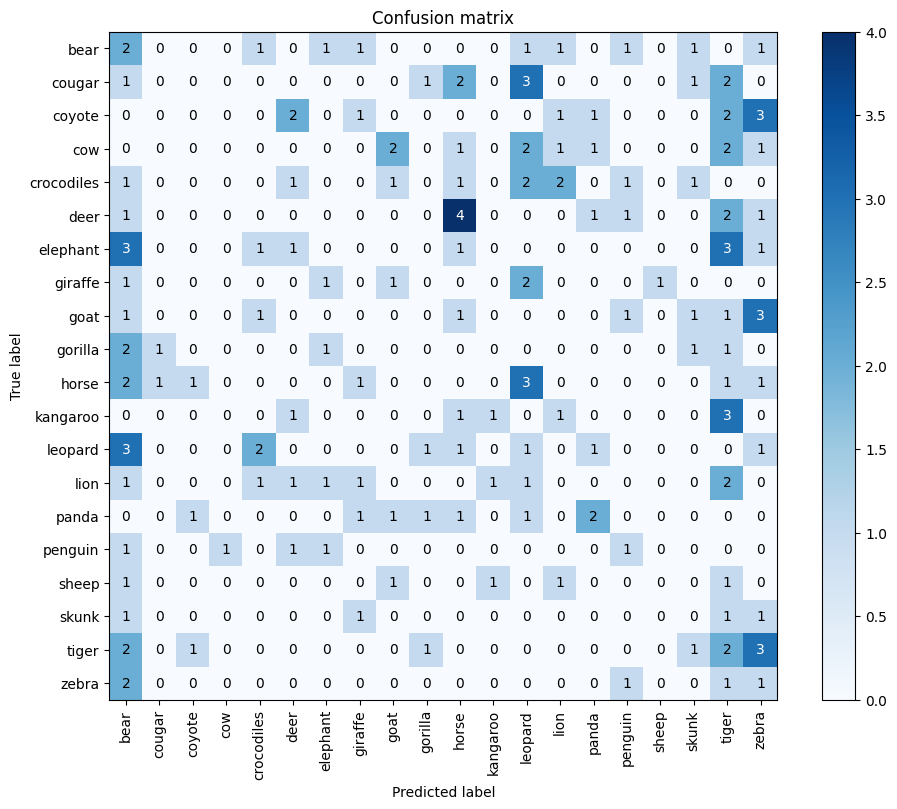

In [106]:
# Plot confusion matrix
plot_confusion_matrix(conf_matrix, classes=animals)

Normalized confusion matrix


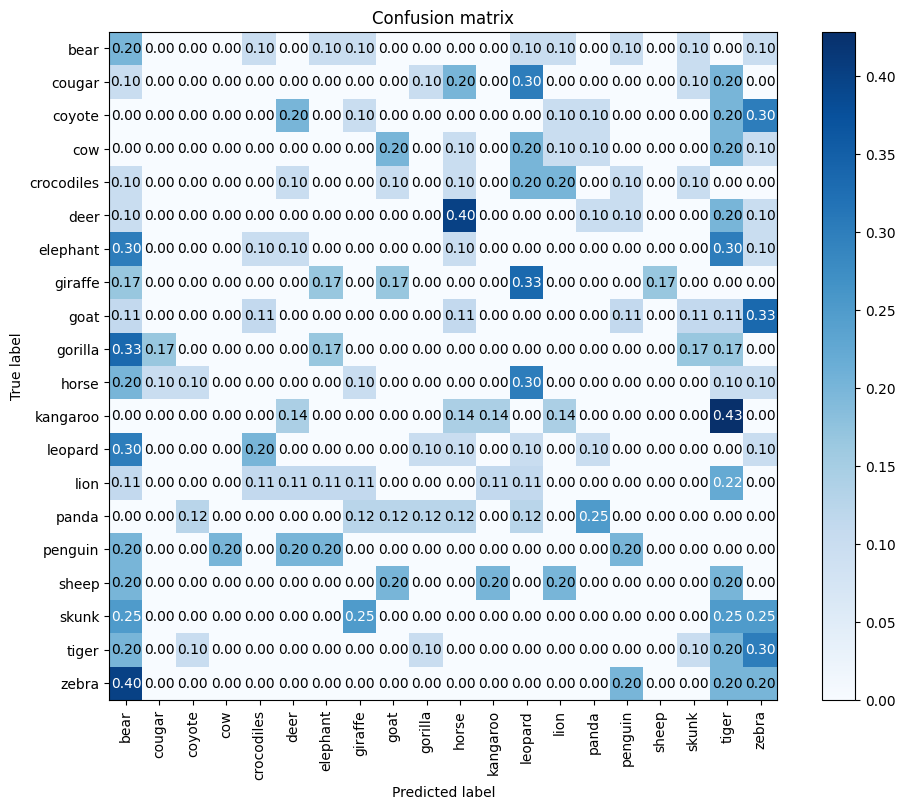

In [107]:
plot_confusion_matrix(conf_matrix, classes=animals, normalize=True)

In [108]:
from keras.utils import img_to_array, load_img

# Function to read and test a single image
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")
    image = load_img(file_path, target_size=(img_width, img_height))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.
    return image


def test_single_image(path):
    images = read_image(path)
    preds = model.predict(images)
    for idx, animal, x in zip(range(0, len(animals)), animals, preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, animal, round(x*100, 2)))
    print('Final Decision:')
    for x in range(3):
        print('.'*(x+1))
    class_predicted = model.predict(images)
    class_prob = list(class_predicted[0])
    max_prob = max(class_prob)
    pred_class = class_prob.index(max_prob)
    print("ID: {}, Label: {}".format(pred_class, animals[pred_class]))
    return load_img(path)

[INFO] loading and preprocessing image...
1/1 [==============================] - 0s 140ms/step
ID: 0, Label: bear 2.66%
ID: 1, Label: cougar 11.83%
ID: 2, Label: coyote 2.66%
ID: 3, Label: cow 1.26%
ID: 4, Label: crocodiles 0.25%
ID: 5, Label: deer 0.32%
ID: 6, Label: elephant 0.12%
ID: 7, Label: giraffe 0.31%
ID: 8, Label: goat 1.33%
ID: 9, Label: gorilla 0.11%
ID: 10, Label: horse 14.37%
ID: 11, Label: kangaroo 0.19%
ID: 12, Label: leopard 33.2%
ID: 13, Label: lion 4.69%
ID: 14, Label: panda 0.71%
ID: 15, Label: penguin 0.18%
ID: 16, Label: sheep 0.73%
ID: 17, Label: skunk 0.33%
ID: 18, Label: tiger 24.74%
ID: 19, Label: zebra 0.02%
Final Decision:
.
..
...
1/1 [==============================] - 0s 168ms/step
ID: 12, Label: leopard


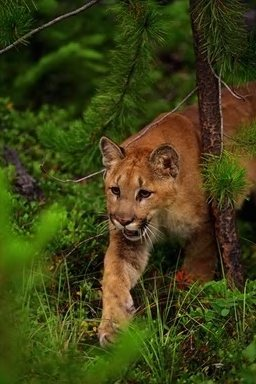

In [109]:
path = 'data/test/cougar/4490.jpg'
test_single_image(path)

In [112]:
# Calculate precision, recall, and F1-score
from sklearn.metrics import precision_recall_curve

precision = precision_score(test_labels, preds_classes, average='weighted')
recall = recall_score(test_labels, preds_classes, average='weighted')
f1 = f1_score(test_labels, preds_classes, average='weighted')

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
# False acceptance rate (FAR) and false rejection rate (FRR)
far = np.sum(conf_matrix.sum(axis=0) - np.diag(conf_matrix)) / \
    np.sum(conf_matrix.sum(axis=1))
frr = np.sum(conf_matrix.sum(axis=1) - np.diag(conf_matrix)) / \
    np.sum(conf_matrix.sum(axis=1))

print("False Acceptance Rate (FAR): {:.2f}".format(far))
print("False Rejection Rate (FRR): {:.2f}".format(frr))

# Calculate average precision for each class
average_precision = []
for i in range(len(animals)):
    precision, recall, _ = precision_recall_curve(
        test_labels == i, preds[:, i])
    average_precision.append(np.mean(precision))

# Compute mean average precision (mAP)
mAP = np.mean(average_precision)
print("Mean Average Precision (mAP): {:.2f}".format(mAP))

Precision: 0.05
Recall: 0.06
F1 Score: 0.05
False Acceptance Rate (FAR): 0.94
False Rejection Rate (FRR): 0.94
Mean Average Precision (mAP): 0.06


In [3]:
from tensorflow import keras
import pydot
# Load the entire model saved earlier (assuming HDF5 format)
model = keras.models.load_model('model_save_selftrained_2.h5')  # Or 'saveselftrained_2.h5'

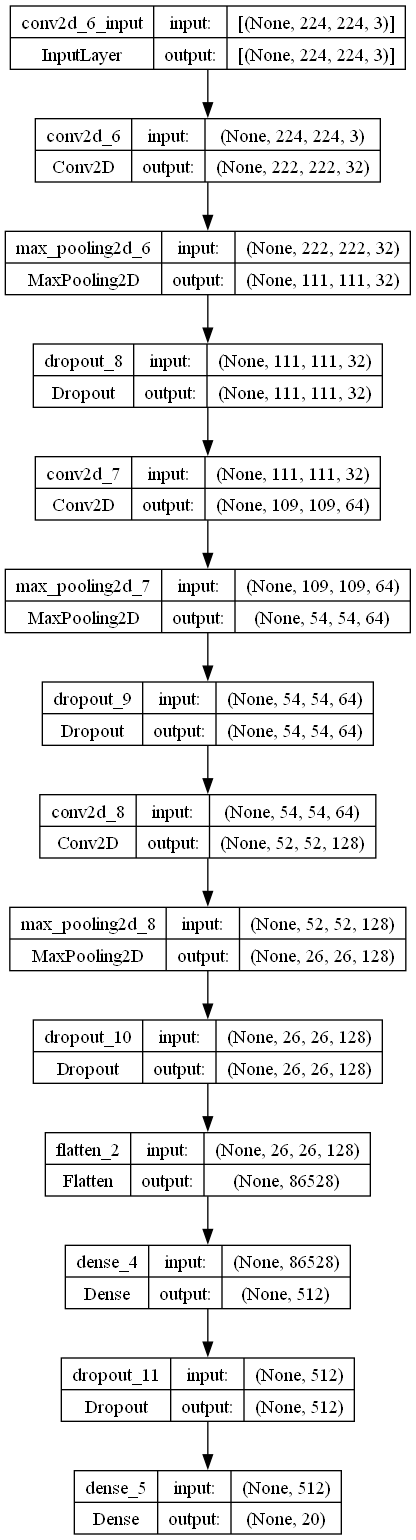

In [4]:
# Generate a visualization of the model architecture
keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [14]:
%pip install pydot


In [12]:
import visualkeras
import os  # For saving the image

# Generate the visualization and save it as "model_architecture.png"
visualkeras.layered_view(model, to_file='output.png')

AttributeError: layers

In [14]:
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[ZeroPadding2D]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model, color_map=color_map)

AttributeError: layers

In [ ]:
%pip install --upgrade visualkeras


In [15]:
print(dir(model))

['_Image__transformer', '__array_interface__', '__class__', '__copy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_category', '_close_exclusive_fp_after_loading', '_copy', '_crop', '_dump', '_ensure_mutable', '_exif', '_expand', '_get_safe_box', '_getxmp', '_new', '_reload_exif', '_repr_png_', '_repr_pretty_', '_size', 'alpha_composite', 'apply_transparency', 'close', 'convert', 'copy', 'crop', 'draft', 'effect_spread', 'encoderconfig', 'encoderinfo', 'entropy', 'filter', 'format', 'format_description', 'frombytes', 'get_child_images', 'getbands', 'getbbox', 'getchannel', 'getcolors', 'getdata', 'getexif', 'getextrema', 'getim', '